In [31]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt

In [32]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select b.* from DatixCRM.dbo.inc_medications b join DatixCRM.dbo.incidents_main a on a.recordid=b.recordid where a.inc_type='PAT' and a.inc_category='MEDIC'"
df = pd.read_sql(query, sql_conn)
df = df.dropna(axis='columns',how='all')
print(df.dtypes)
df.head()

recordid                  int64
inc_id                    int64
imed_class_correct       object
imed_name_admin          object
imed_name_correct        object
imed_route_admin         object
imed_controlled_admin    object
imed_type_admin          object
imed_error_stage         object
imed_error_type          object
dtype: object


,recordid,inc_id,imed_class_correct,imed_name_admin,imed_name_correct,imed_route_admin,imed_controlled_admin,imed_type_admin,imed_error_stage,imed_error_type
0,11050,77791,INST,1308,1308,None,N,INTRV,ADMIN,STORE
1,11052,78004,NOTAPP,CONTRA,CONTRA,None,N,ORAL,ADMIN,WRONG
2,11060,76081,NOTAPP,661,661,None,N,INTRV,ADMIN,OMIT
3,11062,76472,NOTAPP,NOTLIS,NOTLIS,None,N,ORAL,ADMIN,OTHER
4,11086,78201,CDERR,1164,1164,None,Y,ORAL,ADMIN,DOSE


imed_class_correct


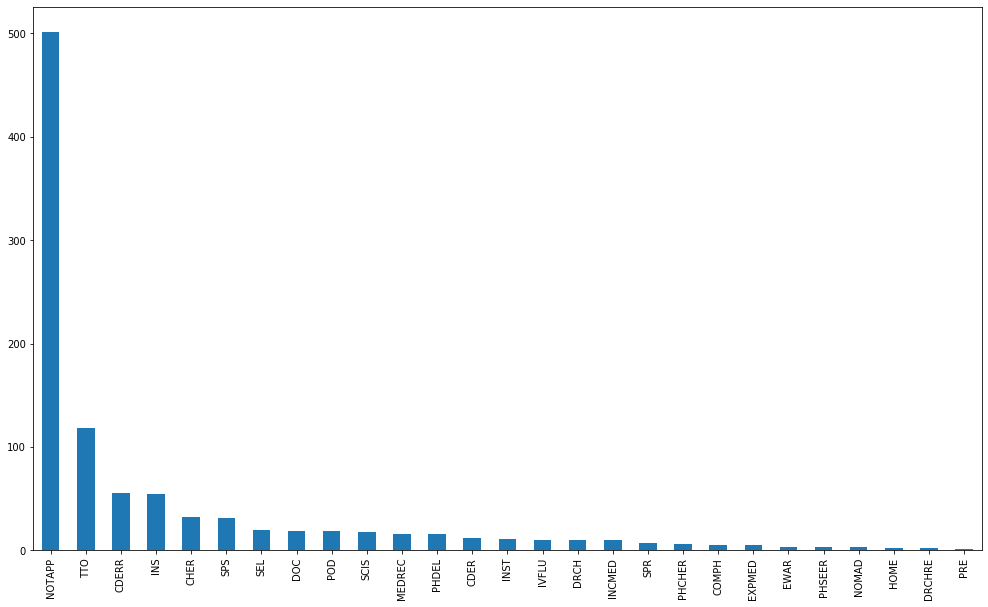

imed_name_admin


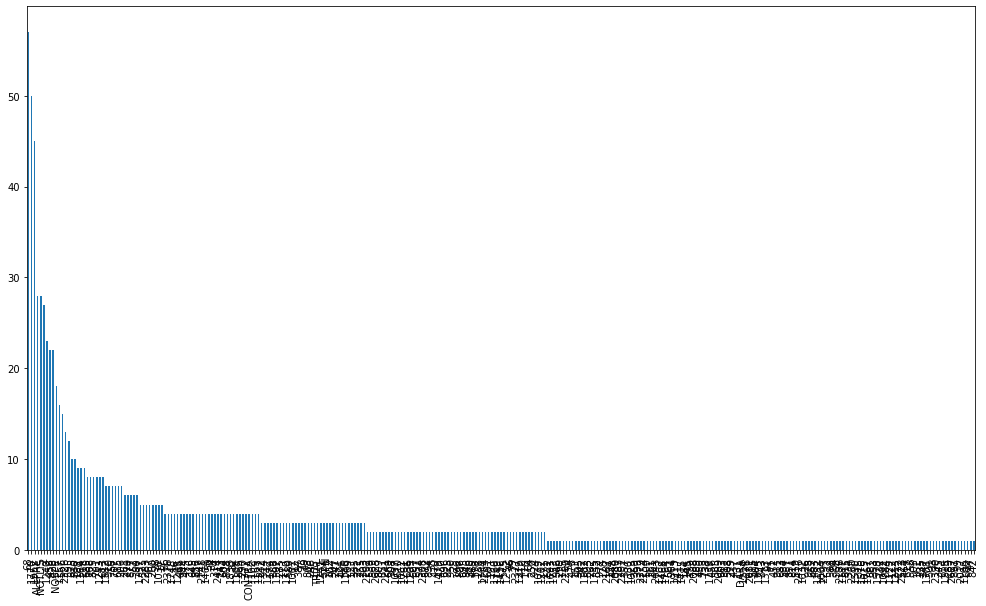

imed_name_correct


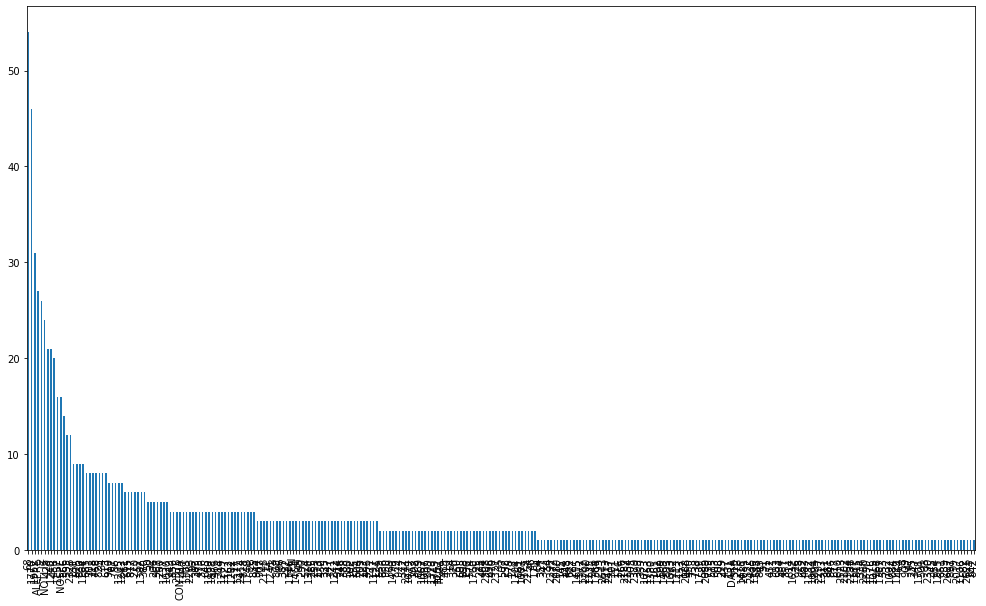

imed_route_admin


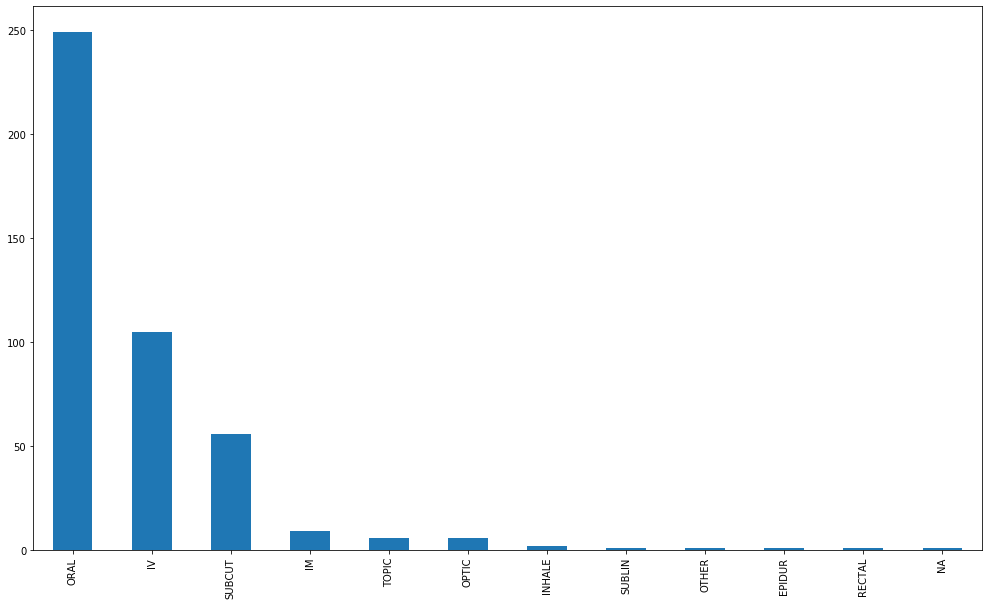

imed_controlled_admin


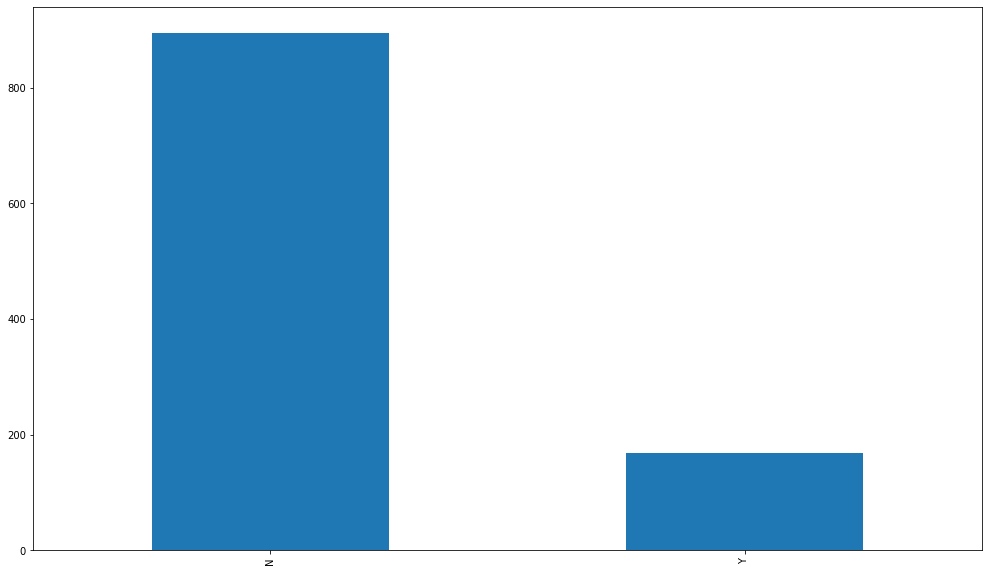

imed_type_admin


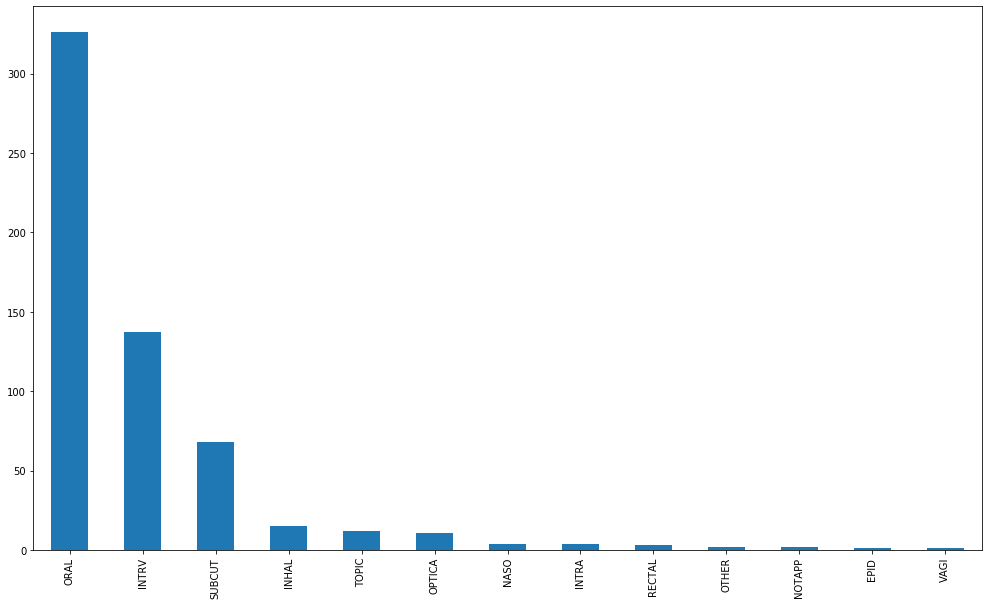

imed_error_stage


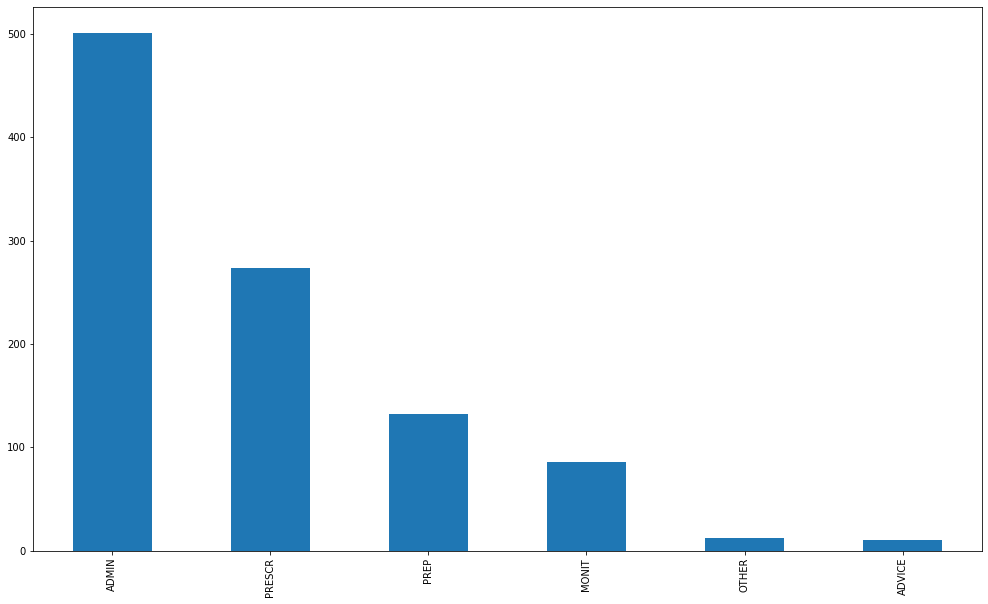

imed_error_type


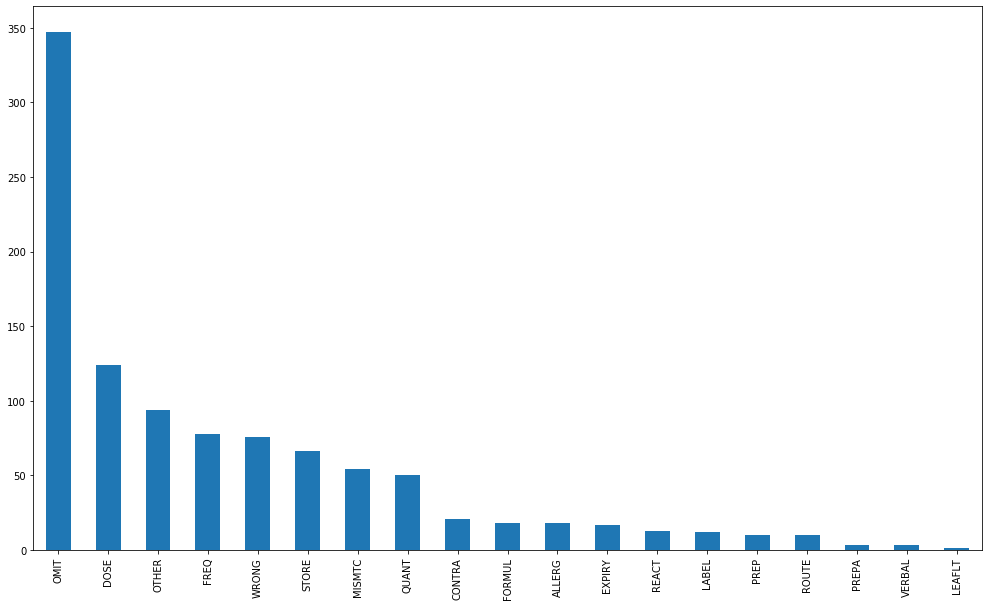

In [34]:
for column in df.select_dtypes(include='object').columns:
    print(column)
    df[column].value_counts().plot(kind='bar',figsize=(17,10))
    plt.show()